# Final Model Alex + YOLO + Seperate Classification

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.layers import Conv2D
from keras.metrics import categorical_crossentropy
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import sklearn
from sklearn.svm import SVC
from sklearn import svm
from sklearn.externals import joblib
from keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\rj133\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rj133\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rj133\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rj133\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#model for all type classification
model_main = Sequential()

model_main.add(ZeroPadding2D((2, 2), input_shape=(256, 256, 3)))
model_main.add(Convolution2D(64, (11, 11), strides=(4, 4), activation='elu'))
model_main.add(BatchNormalization())
model_main.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_main.add(ZeroPadding2D((2, 2)))
model_main.add(Convolution2D(192, (5, 5), activation='relu'))
model_main.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_main.add(ZeroPadding2D((1, 1)))
model_main.add(Convolution2D(384, (3, 3), activation='relu'))
model_main.add(ZeroPadding2D((1, 1)))
model_main.add(Convolution2D(256, (3, 3), activation='relu'))
model_main.add(ZeroPadding2D((1, 1)))
model_main.add(Convolution2D(256, (3, 3), activation='relu'))
model_main.add(ZeroPadding2D((1, 1)))
model_main.add(Convolution2D(128, (3, 3), activation='relu'))
model_main.add(ZeroPadding2D((1, 1)))
model_main.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_main.add(Flatten())
model_main.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.)))
model_main.add(Dropout(0.5))
model_main.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.)))
model_main.add(Dropout(0.5))
model_main.add(Dense(14, activation='softmax'))

model_main.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 260, 260, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        23296     
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 192)       307392    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 192)     

In [3]:
#load weight for main classification
model_main.load_weights('model_main.h5')

In [4]:
#load data and precidt
X_test = np.load('final_test_rgb.npy')  
true_label= np.load('final_test_label.npy')
pre_label = model_main.predict(X_test) 

In [5]:
#model for bread-leftover classification
model_bl = Sequential()

model_bl.add(ZeroPadding2D((2, 2), input_shape=(256, 256, 3)))
model_bl.add(Convolution2D(64, (11, 11), strides=(4, 4), activation='elu'))
model_bl.add(BatchNormalization())
model_bl.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_bl.add(ZeroPadding2D((2, 2)))
model_bl.add(Convolution2D(192, (5, 5), activation='relu'))
model_bl.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_bl.add(ZeroPadding2D((1, 1)))
model_bl.add(Convolution2D(384, (3, 3), activation='relu'))
model_bl.add(ZeroPadding2D((1, 1)))
model_bl.add(Convolution2D(256, (3, 3), activation='relu'))
model_bl.add(ZeroPadding2D((1, 1)))
model_bl.add(Convolution2D(256, (3, 3), activation='relu'))
model_bl.add(ZeroPadding2D((1, 1)))
model_bl.add(Convolution2D(128, (3, 3), activation='relu'))
model_bl.add(ZeroPadding2D((1, 1)))
model_bl.add(MaxPooling2D((3, 3), strides=(2, 2)))

model_bl.add(Flatten())
model_bl.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.)))
model_bl.add(Dropout(0.5))
model_bl.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l1(0.)))
model_bl.add(Dropout(0.5))
model_bl.add(Dense(14, activation='softmax'))

In [6]:
#model for glass-mental-plastic classification
model_gmp = Sequential()
model_gmp.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256, 256, 3)))
model_gmp.add(Activation('elu'))
model_gmp.add(Conv2D(32, (3, 3)))
model_gmp.add(Activation('relu'))
model_gmp.add(MaxPooling2D(pool_size=(2, 2)))

model_gmp.add(Conv2D(64, (3, 3), padding='same'))
model_gmp.add(Activation('relu'))
model_gmp.add(Conv2D(64, (3, 3)))
model_gmp.add(Activation('relu'))
model_gmp.add(MaxPooling2D(pool_size=(2, 2)))

model_gmp.add(Conv2D(128, (3, 3), padding='same'))
model_gmp.add(Activation('relu'))
model_gmp.add(Conv2D(128, (3, 3)))
model_gmp.add(Activation('relu'))
model_gmp.add(MaxPooling2D(pool_size=(2, 2)))

model_gmp.add(Conv2D(256, (3, 3), padding='same'))
model_gmp.add(Activation('relu'))
model_gmp.add(Conv2D(256, (3, 3)))
model_gmp.add(Activation('relu'))
model_gmp.add(Conv2D(128, (1, 1)))
model_gmp.add(MaxPooling2D(pool_size=(2, 2)))

model_gmp.add(Flatten())
model_gmp.add(Dense(512))
model_gmp.add(Activation('relu'))
model_gmp.add(Dropout(0.5))
model_gmp.add(Dense(128))
model_gmp.add(Activation('relu'))
model_gmp.add(Dropout(0.5))
model_gmp.add(Dense(3))
model_gmp.add(Activation('softmax'))

In [7]:
def SVM_2_10(model_bl,X_bl,new_label):
    model_bl.load_weights('model_bl_feature.h5')
    get_feature=Model(inputs=model_bl.input,outputs=model_bl.layers[20].output)
    feature=get_feature.predict(np.array([X_bl]))
    #Since different version of sklearn provide different SVM function, here we did two version of SVM based on our sklearn version.
    if sklearn.__version__=='0.22.1':
        model_bl = joblib.load('model_bl_0.22.m')
        return model_bl.predict(feature)[0]
    elif sklearn.__version__=='0.20.1':
        model_bl = joblib.load('model_bl_0.20.m')
        return model_bl.predict(feature)[0]
    else:
        print('Sorry, our SVM only support 0.20 and 0.22 version.\nWe will skip the SVM part for you.')
        return new_label

In [8]:
def CNN_9_11_13(model_gmp,X_gmp):
    model_gmp.load_weights('model_gmp.h5')
    pred_gmp = model_gmp.predict(np.array([X_gmp]))
    for i in range(len(pred_gmp)):
        label = np.argmax(pred_gmp[i])
        if label == 0:
            return 9
        if label == 1:
            return 11
        if label == 2:
            return 13

In [9]:
#further classification 
pred_result = []
confused_type1 = [2,10]
confused_type2 = [9,11,13]
for i in range(len(pre_label)):
    new_label = np.argmax(pre_label[i])
    if (new_label in confused_type1) == True: #if the result of all type classification is bread or leftovers
        new_label = SVM_2_10(model_bl,X_test[i],pre_label[i])
    if (new_label in confused_type2) == True: #if the result of all type classification is glass, mental or plastic
        new_label = CNN_9_11_13(model_gmp,X_test[i])
    pred_result.append(new_label) #uopdate the label

In [10]:
maps={'bandaid': 0,
 'battery': 1,
 'bread': 2,
 'bulb': 3,
 'cardboard': 4,
 'chopsticks': 5,
 'cigarettebutt': 6,
 'diapers': 7,
 'facialmask': 8,
 'glass': 9,
 'leftovers': 10,
 'metal': 11,
 'paper': 12,
 'plastic': 13}
inv_maps={v:k for k,v in maps.items()}

#the dictionary for small types and big types
dic = {1:0,3:0,2:1,10:1,4:2,9:2,11:2,12:2,13:2,0:3,5:3,6:3,7:3,8:3}

In [11]:
#compute accuracy for small categories
count_small = 0
count_big = 0
test = []
for i in true_label:
    test.append(maps[i])
for i in range(len(pred_result)):
    result = pred_result[i]
    true = test[i]
    if result == true:
        count_small += 1
    if dic[result] == dic[true]:
        count_big += 1
acc_small = count_small/len(pred_result)
acc_big = count_big/len(pred_result)
print('accuracy for small categories: %.4f'%acc_small)
print('accuracy for big categories: %.4f'%acc_big)

accuracy for small categories: 0.8500
accuracy for big categories: 0.9500


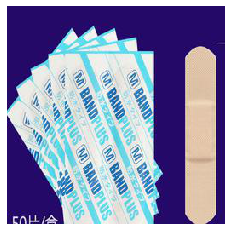

The predict small category is bandaid. The true small category is bandaid.
True!
the predict big category is residual. The true big category is residual.
True!


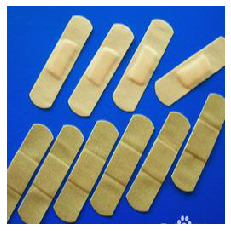

The predict small category is bandaid. The true small category is bandaid.
True!
the predict big category is residual. The true big category is residual.
True!


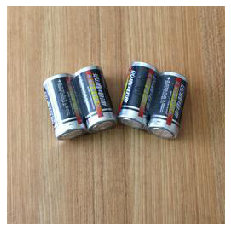

The predict small category is battery. The true small category is battery.
True!
the predict big category is harmful. The true big category is harmful.
True!


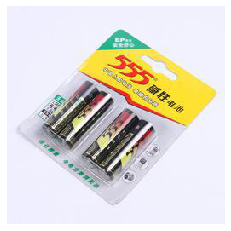

The predict small category is battery. The true small category is battery.
True!
the predict big category is harmful. The true big category is harmful.
True!


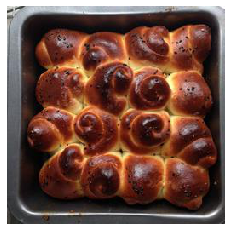

The predict small category is bread. The true small category is bread.
True!
the predict big category is organic. The true big category is organic.
True!


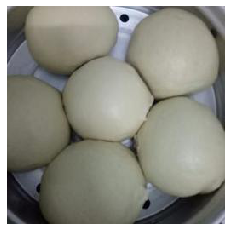

The predict small category is diapers. The true small category is bread.
False!
the predict big category is residual. The true big category is organic.
False!


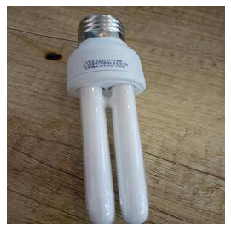

The predict small category is bulb. The true small category is bulb.
True!
the predict big category is harmful. The true big category is harmful.
True!


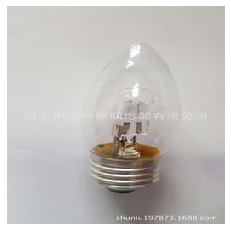

The predict small category is bulb. The true small category is bulb.
True!
the predict big category is harmful. The true big category is harmful.
True!


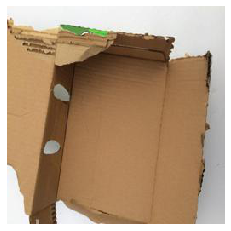

The predict small category is cardboard. The true small category is cardboard.
True!
the predict big category is recoverable. The true big category is recoverable.
True!


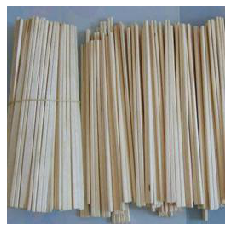

The predict small category is chopsticks. The true small category is chopsticks.
True!
the predict big category is residual. The true big category is residual.
True!


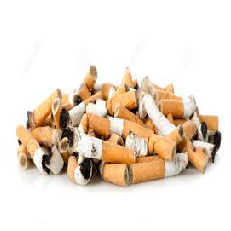

The predict small category is cigarettebutt. The true small category is cigarettebutt.
True!
the predict big category is residual. The true big category is residual.
True!


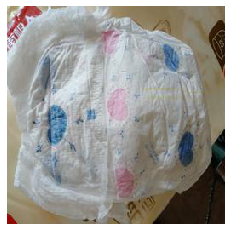

The predict small category is diapers. The true small category is diapers.
True!
the predict big category is residual. The true big category is residual.
True!


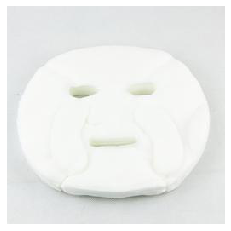

The predict small category is facialmask. The true small category is facialmask.
True!
the predict big category is residual. The true big category is residual.
True!


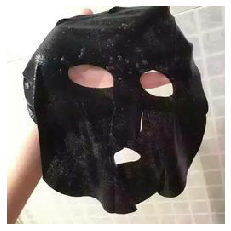

The predict small category is facialmask. The true small category is facialmask.
True!
the predict big category is residual. The true big category is residual.
True!


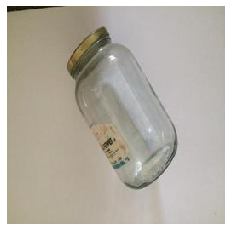

The predict small category is glass. The true small category is glass.
True!
the predict big category is recoverable. The true big category is recoverable.
True!


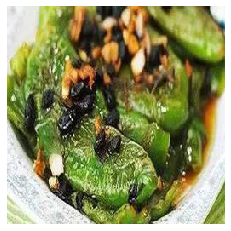

The predict small category is leftovers. The true small category is leftovers.
True!
the predict big category is organic. The true big category is organic.
True!


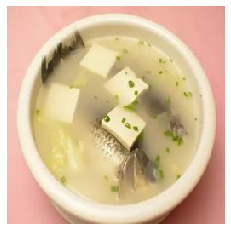

The predict small category is leftovers. The true small category is leftovers.
True!
the predict big category is organic. The true big category is organic.
True!


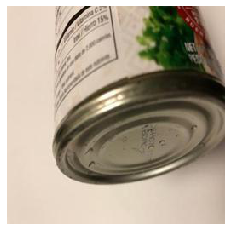

The predict small category is glass. The true small category is metal.
False!
the predict big category is recoverable. The true big category is recoverable.
True!


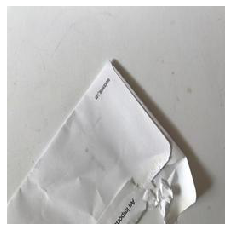

The predict small category is paper. The true small category is paper.
True!
the predict big category is recoverable. The true big category is recoverable.
True!


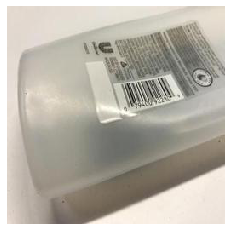

The predict small category is metal. The true small category is plastic.
False!
the predict big category is recoverable. The true big category is recoverable.
True!


In [12]:
#result output
big={0:'harmful',1:'organic',2:'recoverable',3:'residual'}
for i in range(len(pred_result)):
    #show the image of each data
    plt.imshow(Image.fromarray(X_test[i]))
    plt.axis('off')
    plt.show()
    #show the predict result of each data
    print("The predict small category is "+inv_maps[pred_result[i]]+'. The true small category is '+inv_maps[test[i]]+'.')
    if inv_maps[pred_result[i]]==inv_maps[test[i]]:
        print('True!')
    else:
        print('False!')
    print("the predict big category is "+big[dic[pred_result[i]]]+'. The true big category is '+big[dic[test[i]]]+'.')
    if big[dic[pred_result[i]]]==big[dic[test[i]]]:
        print('True!')
    else:
        print('False!')